In [1]:
%run ../../bin/imports.ipynb
from xgboost import XGBClassifier

## Plotting the baseline cell line HLA LOH coverages

In [2]:
train_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v1/training.training_data.csv', index_col=0)

In [3]:
train_df[train_df.LOH == False][['sample', 'gene', 'LOH']].head()

,sample,gene,LOH
0,DNA_NGT-LCS-1907004T,B,False
1,DNA_ILS35295PT4,A,False
2,DNA_ILS35295PT4,B,False
3,DNA_NGT-BR-1905002T,C,False
5,DNA_ILS33973PD4,C,False


In [4]:
green = '#77c722'
blue = '#3864b5'

In [5]:
output_dir = '/rnd/users/rpyke/data/00-DASH/figures'

In [6]:
def plot_results(df, all_positions_df, gene, sample_name, allele1, allele2, loh_type):
    plt.figure(figsize=(6, 3.75))
    sns.set_context('paper', font_scale=0.9)
    plt.subplot(4, 1, 1)
    all_positions_df.coverage_normal_1.plot(color=green)
    all_positions_df.coverage_normal_2.plot(color=blue)
    plt.legend(['{0}'.format(allele1), '{0}'.format(allele2)],
              bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.xlim(0, len(all_positions_df))
    plt.ylabel('Normal\ncoverage')
    plt.title('{0} - gene: {1}'.format(sample_name, gene))
    
    for mismatch in df.Mismatch_positions_1:
        plt.axvline(mismatch, color='k', alpha=0.2)

    plt.subplot(4, 1, 2)
    all_positions_df.coverage_tumor_1.plot(color=green)
    all_positions_df.coverage_tumor_2.plot(color=blue)
    plt.legend(['{0}'.format(allele1), '{0}'.format(allele2)],
              bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.xlim(0, len(all_positions_df))
    plt.ylabel('Tumor\ncoverage')

    for mismatch in df.Mismatch_positions_1:
        plt.axvline(mismatch, color='k', alpha=0.2)

    plt.subplot(4, 1, 3)

    #plt.scatter(df.Mismatch_positions_1, 1 - df.BAF, color='black')
    #plt.scatter(df.Mismatch_positions_1, 1 - df.BAF_normal, color='darkgrey')
    plt.scatter(df.Mismatch_positions_1, df.BAF, color='black', s=2)
    plt.scatter(df.Mismatch_positions_1, df.BAF_normal, color='darkgrey', s=2)
    plt.legend(['Tumor', 'Normal'],
              bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.axhline(0.5, color='grey', linestyle='--')
    plt.xlim(0, len(all_positions_df))
    plt.ylim(0, 1)
    plt.ylabel('B-allele\nfrequency')

    plt.subplot(4, 1, 4)
    plt.scatter(df.Alignment_mismatch, df.R1, color=green, s=2)
    plt.scatter(df.Alignment_mismatch, df.R2, color=blue, s=2)
    plt.legend(['{0}'.format(allele1), '{0}'.format(allele2)],
              bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.axhline(1, color='grey', linestyle='--')
    plt.xlim(0, len(all_positions_df))
    plt.ylim(0, 3)
    plt.ylabel('T/N\ncoverage\nratio')
    plt.xlabel('Genomic position')

    #plt.show()
    #plt.savefig('/rnd/users/rpyke/data/00-DASH/for_others/DNA_INOVA_054B_C.gene_A.pdf')
    
    plt.savefig('{0}/Mannual_annotation.{1}.{2}.{3}.pdf'.format(output_dir, loh_type, sample_name, gene),
                bbox_inches='tight')
    plt.show()

In [7]:
train_df[train_df.LOH == False][['sample', 'gene', 'LOH']].head()

,sample,gene,LOH
0,DNA_NGT-LCS-1907004T,B,False
1,DNA_ILS35295PT4,A,False
2,DNA_ILS35295PT4,B,False
3,DNA_NGT-BR-1905002T,C,False
5,DNA_ILS33973PD4,C,False


In [8]:
input_dir = '/rnd/users/rpyke/data/00-DASH/output/pipeline_nextDB_06'


In [9]:
# Negative: DNA_ILS33973PD4 C
# Positive: DNA_ILS42211PT2 B

DNA_ILS33973PD4 A


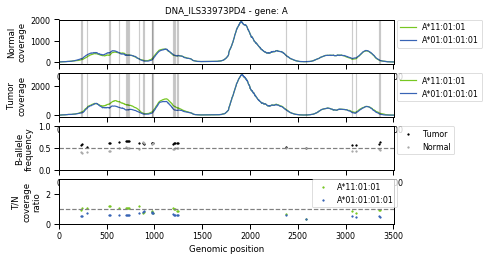

DNA_ILS38706PT3-DS1 A


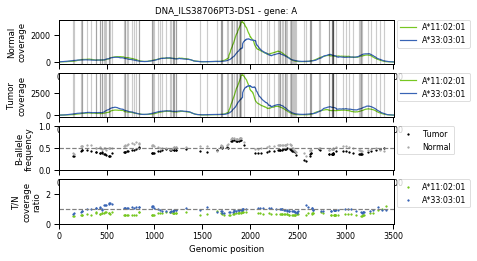

DNA_ILS38706PT3-DS1 B


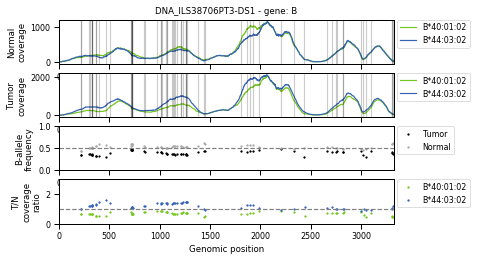

DNA_ILS38706PT3-DS1 C


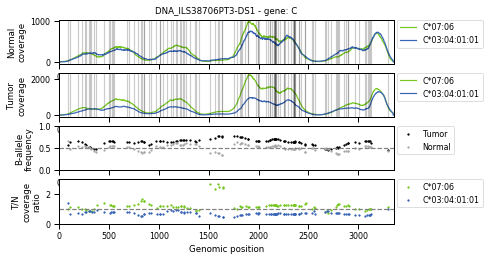

DNA_ILS42211PT2 B


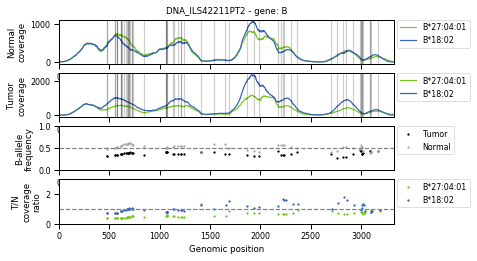

In [10]:
for sample_name, gene in zip(list(train_df[train_df.LOH == True]['sample'])[:5],
                            list(train_df[train_df.LOH == True]['gene'])[:5]):

    print(sample_name, gene)

    path_ffn = '{0}/{1}'.format(input_dir, sample_name)
    dash_output_df = pd.read_csv('{0}/DASH.output.txt'.format(path_ffn), '\t')
    alleles = list(dash_output_df[dash_output_df.hla_locus == gene].hla_assign_allele)

    allele1 = alleles[0]
    allele2 = alleles[1]

    if list(dash_output_df[dash_output_df.hla_locus == gene].alternate_copy_number)[0] != '-':

        df = pd.read_csv('{0}/DASH.mismatches_{1}.csv'.format(path_ffn, gene))
        all_positions_df = pd.read_csv('{0}/DASH.all_positions_{1}.csv'.format(path_ffn, gene))
        plot_results(df, all_positions_df, gene, sample_name, allele1, allele2, 'Positive')

    else:

        print('Homozygous')